# Analyse de répartition de richesse en France à travers le spectre des Iris 

Les données utilisées pour faire cette étude proviennent de l'INSEE se sont des données datant de 2025. On y retrouve des indicateurs de richesse au niveau des regions Iris . 

source: https://www.insee.fr/fr/statistiques/8229323 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Chargement des données

In [3]:
path = "dataset/BASE_TD_FILO_IRIS_2021_DEC.csv"


df = pd.read_csv(path, sep=";", decimal=",")
# Identify columns that contain numerical values with comma
num_cols = [col for col in df.columns if df[col].str.contains(",", na=False).any()]

# Convert them: replace "," -> "." then cast to float
for col in num_cols:
    df[col] = df[col].str.replace(",", ".", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Check result
df[num_cols].head()

,DEC_PIMP21,DEC_TP6021,DEC_EQ21,DEC_RD21,DEC_S80S2021,DEC_GI21,DEC_PACT21,DEC_PTSA21,DEC_PCHO21,DEC_PBEN21,DEC_PPEN21,DEC_PAUT21
0,43.0,29.0,0.71,4.4,6.3,0.318,69.3,62.5,3.2,3.6,27.1,3.6
1,42.0,39.0,0.89,7.1,9.0,0.362,70.5,63.7,4.4,2.4,25.6,3.9
2,47.0,29.0,0.77,5.7,8.0,0.352,69.3,61.9,3.6,3.8,26.7,4.0
3,62.0,14.0,0.65,3.8,6.3,0.360,65.5,60.0,2.3,3.2,21.8,12.7
4,42.0,31.0,0.94,8.5,10.6,0.390,74.1,67.5,4.8,1.8,23.0,2.9


In [4]:
# Count NA per column
na_counts = df.isna().sum().sort_values(ascending=False)
na_counts

DEC_RD21        2219
DEC_PBEN21      1760
DEC_PCHO21      1760
DEC_PTSA21      1760
DEC_S80S2021    1577
DEC_TP6021      1537
DEC_EQ21        1536
DEC_PPEN21      1536
DEC_PACT21      1536
DEC_PIMP21      1536
DEC_PAUT21      1536
DEC_GI21        1536
DEC_Q321           0
DEC_D121           0
DEC_INCERT21       0
DEC_Q121           0
IRIS               0
DEC_MED21          0
DEC_D221           0
DEC_D921           0
DEC_D821           0
DEC_D721           0
DEC_D421           0
DEC_D321           0
DEC_D621           0
DEC_NOTE21         0
dtype: int64

In [5]:
df.size

416676

In [6]:
df.describe()

,DEC_PIMP21,DEC_TP6021,DEC_EQ21,DEC_RD21,DEC_S80S2021,DEC_GI21,DEC_PACT21,DEC_PTSA21,DEC_PCHO21,DEC_PBEN21,DEC_PPEN21,DEC_PAUT21
count,14490.000000,14489.000000,14490.000000,13807.000000,14449.000000,14490.000000,14490.000000,14266.000000,14266.000000,14266.000000,14490.000000,14490.000000
mean,52.146170,26.847056,0.852001,19.257594,68.025829,0.368841,68.291408,60.688778,3.391511,4.228130,26.291035,5.417557
std,15.649621,15.984629,0.244589,149.784441,3002.501832,0.068532,9.638520,9.712267,1.443621,2.427743,8.954575,5.145894
min,5.000000,3.000000,0.410000,2.400000,2.800000,0.198000,19.400000,16.500000,0.400000,0.200000,-0.300000,-0.100000
25%,41.000000,15.000000,0.680000,4.500000,6.000000,0.321000,62.300000,54.600000,2.400000,2.500000,19.700000,2.600000
50%,53.000000,23.000000,0.810000,6.200000,8.300000,0.362000,68.800000,61.300000,3.100000,3.700000,25.700000,4.200000
75%,63.000000,36.000000,0.970000,9.300000,12.400000,0.407000,75.100000,67.600000,4.100000,5.500000,32.200000,6.500000
max,93.000000,95.000000,5.300000,6617.000000,338713.400000,0.803000,98.200000,96.500000,13.300000,31.700000,66.400000,69.500000


In [7]:
vars_of_interest = [
    "DEC_MED21",    # Revenu médian
    "DEC_Q121",     # Premier quartile
    "DEC_Q321",     # Troisième quartile
    "DEC_D121",     # Décile 1
    "DEC_D221",     # Décile 2
    "DEC_D321",     # Décile 3
    "DEC_TP6021",   # Taux de pauvreté
    "DEC_PIMP21"    # Part des impôts
]

subset = df[vars_of_interest].copy()
subset.head()


,DEC_MED21,DEC_Q121,DEC_Q321,DEC_D121,DEC_D221,DEC_D321,DEC_TP6021,DEC_PIMP21
0,19330,12610,26390,7760,11300,13900,29.0,43.0
1,16830,9730,24620,4680,8600,11070,39.0,42.0
2,19940,12220,27650,6500,10300,14220,29.0,47.0
3,25560,18350,35010,11960,16450,19860,14.0,62.0
4,19870,11280,30050,5250,9790,13120,31.0,42.0


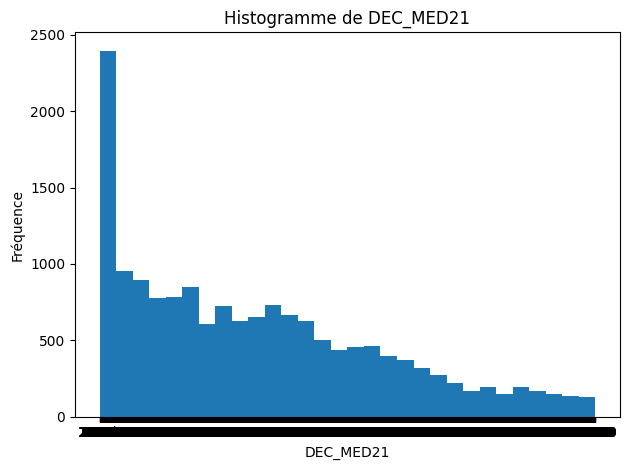

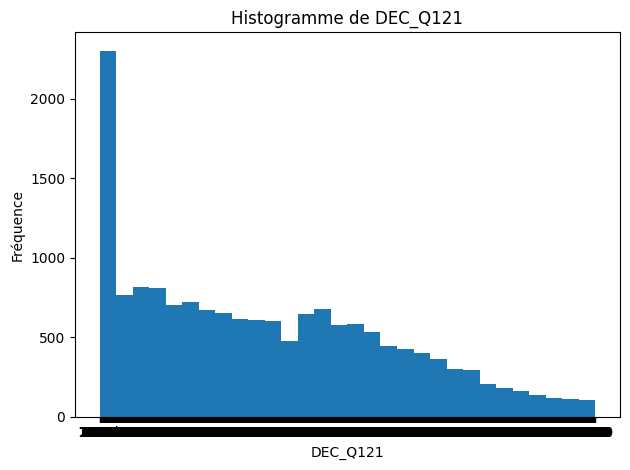

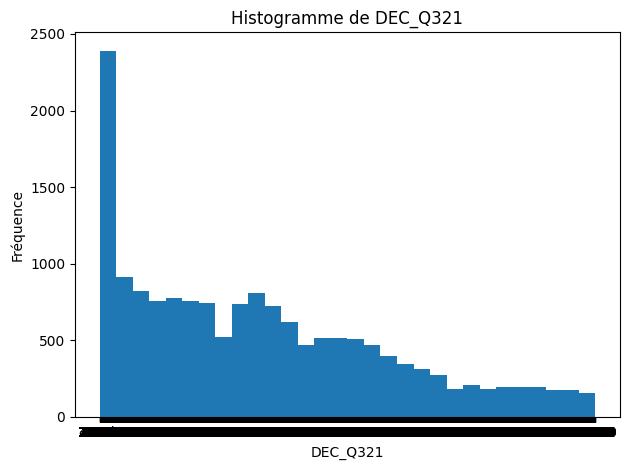

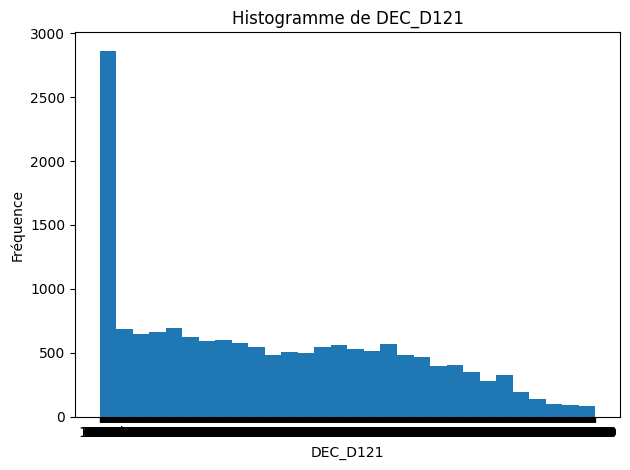

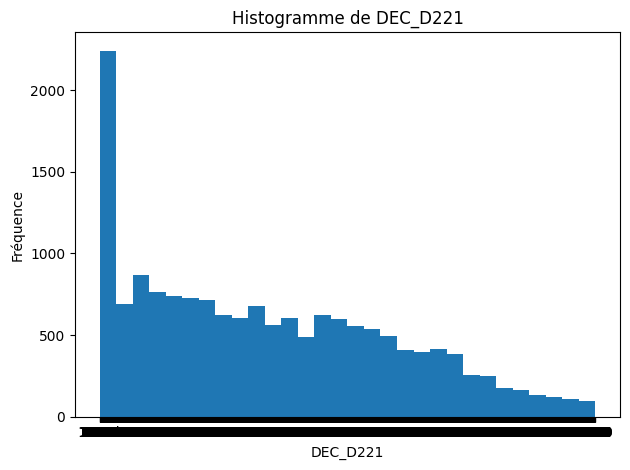

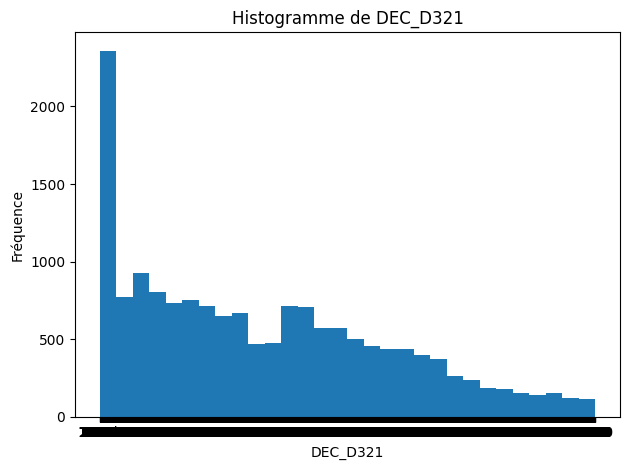

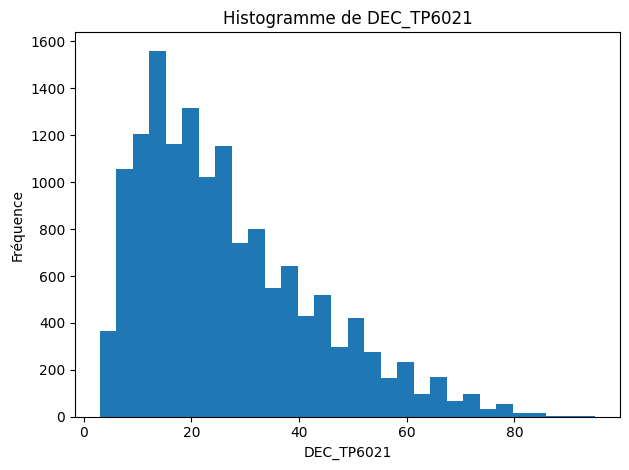

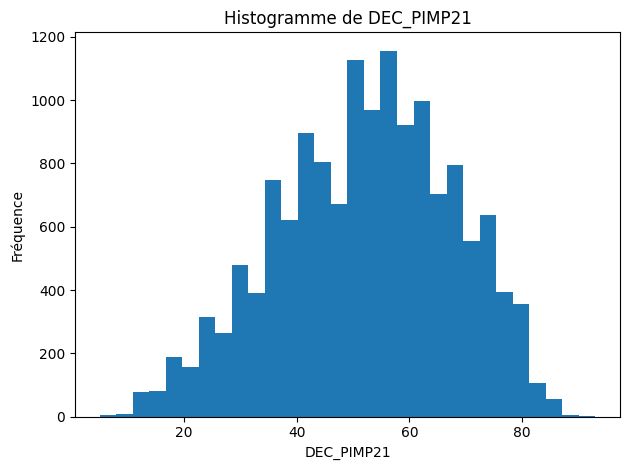

In [10]:
for col in vars_of_interest:
    data = subset[col]
    plt.figure()
    plt.hist(data, bins = 30)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.tight_layout()
    plt.show()

on peut voir que DEC_MED21",    # Revenu médian
    "DEC_Q121",     # Premier quartile
    "DEC_Q321",     # Troisième quartile
    "DEC_D121",     # Décile 1
    "DEC_D221",     # Décile 2
    "DEC_D321",     # Décile 3 semblent tous suivre une même loi 

    et que  "DEC_TP6021",   # Taux de pauvreté
    "DEC_PIMP21"    # Part des impôts semble chacun suivre une autre loie 

    on se propose alors de faire trois estimateurs afin d'estimer ses trois loies 